In [1]:
import numpy as np
import cv2 as cv
img = cv.imread('lena.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
import warnings
warnings.filterwarnings('ignore')

In [2]:
img.shape

(225, 225, 3)

In [3]:
#greyimg=(img[:,:,1]+img[:,:,2]+img[:,:,0])

In [4]:
greyimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [5]:
cv.imshow('lenagrey',greyimg)
cv.imshow('lena',img)
cv.waitKey()
cv.destroyAllWindows()

### negative img

In [6]:
negativeimg=np.zeros(greyimg.shape,np.uint8)

In [7]:
negativeimg=255-greyimg

In [8]:
cv.imshow('negative',negativeimg)
cv.waitKey()
cv.destroyAllWindows()

### power img


In [13]:
powerimg=np.zeros(greyimg.shape,np.float64)

In [14]:
power04img=(255*(greyimg/255)**2).astype(np.uint8)

In [15]:
power04img

array([[ 97,  97,  97, ...,  95, 100,  72],
       [ 97,  97,  96, ..., 113, 127,  81],
       [ 96,  96,  96, ...,  77,  73,  29],
       ...,
       [ 10,   8,   7, ...,  17,  25,  30],
       [  9,   6,   5, ...,  20,  33,  33],
       [  5,  19,   6, ...,  34,  39,  40]], dtype=uint8)

In [16]:
cv.imshow('power',power04img)
#cv.imshow('lena',l)
cv.waitKey()
cv.destroyAllWindows()

### Histogram Equalization

In [17]:
histogram=np.zeros(255)

In [18]:
histogram

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
row,col=greyimg.shape

In [20]:
for i in range(row):
    for j in range(col):
        histogram[greyimg[i][j]]+=1

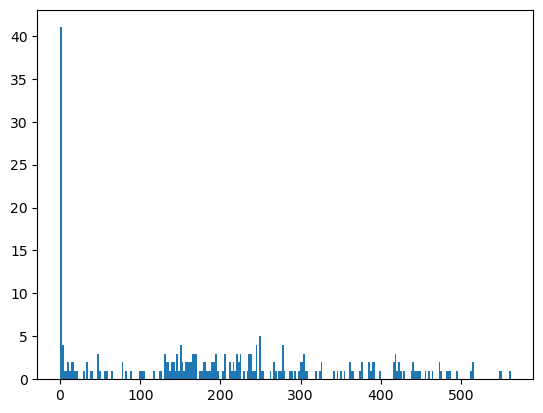

In [21]:

import matplotlib.pyplot as plt


plt.hist(histogram, bins=256)     # 히스토그램 bins는 사각형 기둥의 수
plt.show()

In [22]:
sum_hist=np.zeros(256)

In [23]:
greyimg.shape

(225, 225)

In [24]:
sum=0;
scale_facroe=255.0

for i in range(255):
    sum+=histogram[i]
    sum_hist[i]=(sum*(255/(225*225)))+0.5
    

In [25]:
sum_hist.astype(np.uint8)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   1,
         2,   2,   3,   3,   3,   4,   4,   5,   6,   7,   7,   8,   9,
        11,  12,  13,  15,  17,  19,  21,  23,  25,  26,  28,  30,  31,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  69,  70,
        71,  73,  74,  76,  78,  80,  83,  85,  87,  88,  90,  91,  93,
        94,  95,  96,  98,  99, 100, 101, 103, 104, 105, 106, 108, 109,
       111, 112, 114, 116, 118, 120, 123, 125, 128, 130, 132, 134, 136,
       138, 140, 142, 144, 145, 147, 149, 152, 154, 157, 159, 162, 164,
       166, 169, 171, 173, 175, 177, 179, 182, 185, 187, 190, 192, 194,
       197, 199, 201, 202, 204, 205, 207, 208, 209, 210, 211, 213, 214,
       216, 217, 218, 219, 221, 222, 222, 223, 224, 225, 226, 22

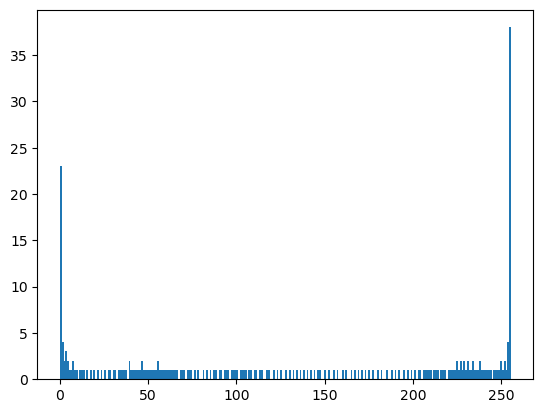

In [26]:
plt.hist(sum_hist, bins=256)     # 히스토그램 bins는 사각형 기둥의 수
plt.show()

In [27]:
equalization=np.zeros([row,col],np.uint8)

In [28]:
equalization.shape


(225, 225)

In [29]:
for i in range(row):
    for j in range(col):
        equalization[i][j]=sum_hist[greyimg[i][j]]

In [30]:
cv.imshow('equalization',equalization)
cv.imshow('greylena',greyimg)
cv.waitKey()
cv.destroyAllWindows()